<a href="https://colab.research.google.com/github/jackson119/ject_pro/blob/main/keras_Mnist_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.0
#!pip install tensorflow==1.0.1

     |████████████████████████████████| 44.5MB 66kB/s 
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [2]:
#!pip install keras==2.0.2

     |████████████████████████████████| 194kB 8.4MB/s 
  Created wheel for keras: filename=Keras-2.0.2-cp36-none-any.whl size=228896 sha256=a0feeff0db30740fe0b4c28c0b1ec3e958c7ccd7955ab21a4a7d7ce919a38790
  Stored in directory: /root/.cache/pip/wheels/78/38/73/74028957a9c42049a56878c4bb8a2c732c3e205f599fb9b384
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.2 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [1]:
import keras 
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarn

'2.0.2'

In [2]:
import tensorflow as tf
tf.__version__


'1.0.1'

In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils #### Used to change the label to  one hot encoding.
np.random.seed(10)               ### to ensure everytime  will give the same results
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [4]:
(x_train_image,y_train_label), \
(x_test_image,y_test_label)=mnist.load_data()



# **Read mnist dataset**

In [5]:
print('train data=',len(x_train_image))
print('test data=',len(x_test_image))

train data= 60000
test data= 10000


### **Evaluate the shape of** **dataset**

In [6]:
print('train data=',(x_train_image.shape))
print('test data=',(y_train_label.shape))

train data= (60000, 28, 28)
test data= (60000,)


In [7]:
def plot_image(image):
  fig=plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image,cmap='binary')
  plt.show()

In [8]:
print(y_train_label)

[5 0 4 ... 5 6 8]


### Check for training  image datasets and training label datasets

In [9]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25          ### set the number to 25 if exceed it will set to 25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)  ## increase by 1 everytime
    ax.imshow(images[idx],cmap='binary') #### plot the graph
    title='label='+str(labels[idx])      ####  set the title

    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([]) ### wont show the scale for x axis and y axis

    idx+=1
plt.show()

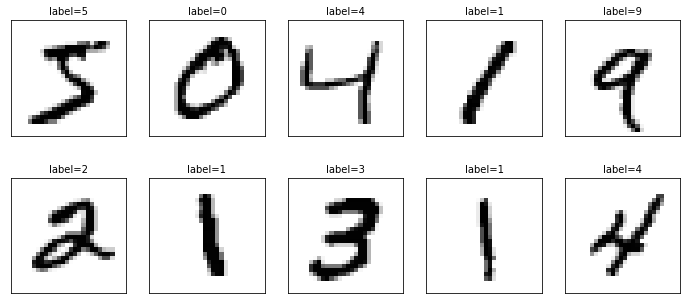

In [10]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

### **multilayer perceptron data** **preprocessing** 

---

> Indented block

1.   convert to float. 
2.   divide by 255 to increase the accuracy.







In [11]:
print('x_train.image',x_train_image.shape)
print('y_train_label',y_train_label.shape)

x_train.image (60000, 28, 28)
y_train_label (60000,)


In [12]:
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [13]:
print('x_train',x_Train.shape)
print('x_test',x_Test.shape)

x_train (60000, 784)
x_test (10000, 784)


In [14]:
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [15]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### preprocessing the label data

label will be convert into one hot encoding

In [16]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [18]:
y_TestOneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### define training process and started to train.

In [19]:
model=Sequential()

In [20]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [21]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530.0
Trainable params: 203,530
Non-trainable params: 0.0
_________________________________________________________________
None


In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
3s - loss: 0.4379 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9406
Epoch 2/10
3s - loss: 0.1910 - acc: 0.9456 - val_loss: 0.1554 - val_acc: 0.9558
Epoch 3/10
3s - loss: 0.1353 - acc: 0.9617 - val_loss: 0.1258 - val_acc: 0.9644
Epoch 4/10
3s - loss: 0.1025 - acc: 0.9704 - val_loss: 0.1117 - val_acc: 0.9683
Epoch 5/10
3s - loss: 0.0808 - acc: 0.9773 - val_loss: 0.0983 - val_acc: 0.9710
Epoch 6/10
3s - loss: 0.0660 - acc: 0.9818 - val_loss: 0.0935 - val_acc: 0.9723
Epoch 7/10
3s - loss: 0.0543 - acc: 0.9851 - val_loss: 0.0914 - val_acc: 0.9733
Epoch 8/10
3s - loss: 0.0460 - acc: 0.9876 - val_loss: 0.0835 - val_acc: 0.9760
Epoch 9/10
3s - loss: 0.0379 - acc: 0.9903 - val_loss: 0.0822 - val_acc: 0.9763
Epoch 10/10
3s - loss: 0.0315 - acc: 0.9917 - val_loss: 0.0805 - val_acc: 0.9762


In [25]:
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('Train')
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

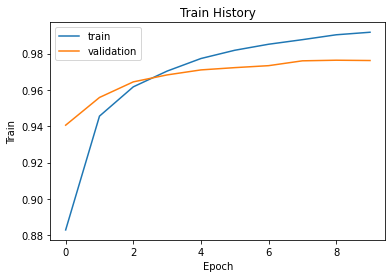

In [26]:
show_train_history(train_history,'acc','val_acc')

In [27]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot,verbose=2)
print('scores=',scores[1])

scores= 0.9764


In [28]:
prediction=model.predict_classes(x_Test)

 9184/10000 [==========================>...] - ETA: 0s

In [29]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

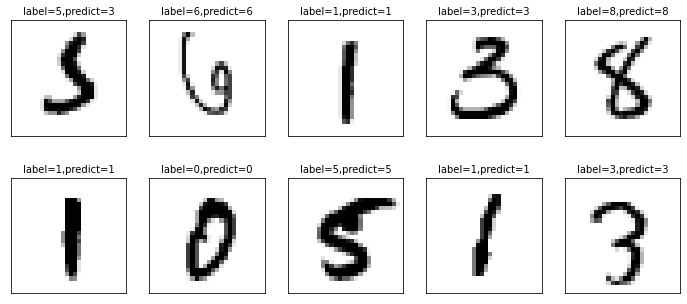

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [31]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1009,2,1,0,2,5,8,0
3,0,0,5,989,0,2,0,4,6,4
4,2,0,5,1,960,0,3,0,3,8
5,3,0,0,15,1,854,7,1,8,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,12,6,1,0,0,989,6,9
8,4,0,3,5,2,1,1,2,955,1


In [32]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})

In [33]:
df[:11]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [34]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


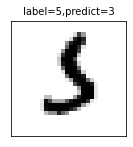

In [35]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

#### Adding 1000 hidden layer into the neural network

In [36]:
model=Sequential()

In [37]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [38]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [39]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010.0
Trainable params: 795,010
Non-trainable params: 0.0
_________________________________________________________________
None


In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
train_histrory=model.fit(x_Train_normalize,y_TrainOneHot,validation_split=0.20,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
12s - loss: 0.2904 - acc: 0.9166 - val_loss: 0.1534 - val_acc: 0.9565
Epoch 2/10
12s - loss: 0.1150 - acc: 0.9674 - val_loss: 0.1214 - val_acc: 0.9640
Epoch 3/10
12s - loss: 0.0736 - acc: 0.9792 - val_loss: 0.0918 - val_acc: 0.9730
Epoch 4/10
12s - loss: 0.0520 - acc: 0.9854 - val_loss: 0.0817 - val_acc: 0.9750
Epoch 5/10
12s - loss: 0.0358 - acc: 0.9905 - val_loss: 0.0832 - val_acc: 0.9751
Epoch 6/10
12s - loss: 0.0248 - acc: 0.9939 - val_loss: 0.0745 - val_acc: 0.9780
Epoch 7/10
12s - loss: 0.0183 - acc: 0.9956 - val_loss: 0.0730 - val_acc: 0.9773
Epoch 8/10
12s - loss: 0.0135 - acc: 0.9969 - val_loss: 0.0757 - val_acc: 0.9783
Epoch 9/10
12s - loss: 0.0099 - acc: 0.9981 - val_loss: 0.0722 - val_acc: 0.9792
Epoch 10/10
12s - loss: 0.0069 - acc: 0.9990 - val_loss: 0.0791 - val_acc: 0.9772


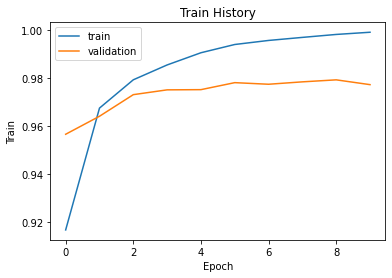

In [42]:
show_train_history(train_histrory,'acc','val_acc')

In [43]:
evaluation=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('evaluation accuracy',evaluation[1])

 9952/10000 [============================>.] - ETA: 0s
evaluation accuracy 0.9801


#### Adding dropout parameter in multilayer perceptron

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [45]:
model=Sequential()

In [46]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [47]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [48]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010.0
Trainable params: 795,010
Non-trainable params: 0.0
_________________________________________________________________
None


In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
train_history=model.fit(x_Train_normalize,y_TrainOneHot,validation_split=0.20,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
12s - loss: 0.2915 - acc: 0.9164 - val_loss: 0.1539 - val_acc: 0.9549
Epoch 2/10
12s - loss: 0.1161 - acc: 0.9669 - val_loss: 0.1106 - val_acc: 0.9670
Epoch 3/10
12s - loss: 0.0727 - acc: 0.9790 - val_loss: 0.0901 - val_acc: 0.9737
Epoch 4/10
12s - loss: 0.0505 - acc: 0.9854 - val_loss: 0.0783 - val_acc: 0.9766
Epoch 5/10
12s - loss: 0.0359 - acc: 0.9901 - val_loss: 0.0771 - val_acc: 0.9764
Epoch 6/10
12s - loss: 0.0247 - acc: 0.9938 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 7/10
12s - loss: 0.0186 - acc: 0.9956 - val_loss: 0.0751 - val_acc: 0.9773
Epoch 8/10
12s - loss: 0.0126 - acc: 0.9975 - val_loss: 0.0763 - val_acc: 0.9768
Epoch 9/10
12s - loss: 0.0095 - acc: 0.9981 - val_loss: 0.0685 - val_acc: 0.9794
Epoch 10/10
12s - loss: 0.0060 - acc: 0.9992 - val_loss: 0.0691 - val_acc: 0.9803


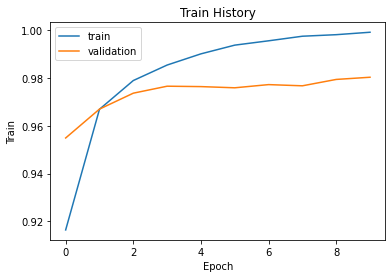

In [51]:
show_train_history(train_history,'acc','val_acc')

In [52]:
scores_add=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

 9888/10000 [============================>.] - ETA: 0s
accuracy= 0.9764


### Adding two more hidden layers into multi layer perceptron.

In [53]:
model=Sequential()

In [54]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

In [55]:
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

In [56]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [57]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010.0
Trainable params: 1,796,010.0
Non-trainable params: 0.0
_________________________________________________________________
None


In [58]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
train_history=model.fit(x_Train_normalize,y_TrainOneHot,validation_split=0.20,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
31s - loss: 0.3739 - acc: 0.8831 - val_loss: 0.1323 - val_acc: 0.9603
Epoch 2/10
31s - loss: 0.1606 - acc: 0.9501 - val_loss: 0.1006 - val_acc: 0.9693
Epoch 3/10
31s - loss: 0.1201 - acc: 0.9625 - val_loss: 0.0936 - val_acc: 0.9728
Epoch 4/10
31s - loss: 0.0970 - acc: 0.9697 - val_loss: 0.0792 - val_acc: 0.9763
Epoch 5/10
31s - loss: 0.0841 - acc: 0.9734 - val_loss: 0.0767 - val_acc: 0.9768
Epoch 6/10
31s - loss: 0.0750 - acc: 0.9763 - val_loss: 0.0769 - val_acc: 0.9771
Epoch 7/10
32s - loss: 0.0655 - acc: 0.9790 - val_loss: 0.0775 - val_acc: 0.9791
Epoch 8/10
32s - loss: 0.0623 - acc: 0.9798 - val_loss: 0.0709 - val_acc: 0.9807
Epoch 9/10
31s - loss: 0.0550 - acc: 0.9824 - val_loss: 0.0735 - val_acc: 0.9797
Epoch 10/10
31s - loss: 0.0509 - acc: 0.9833 - val_loss: 0.0715 - val_acc: 0.9798


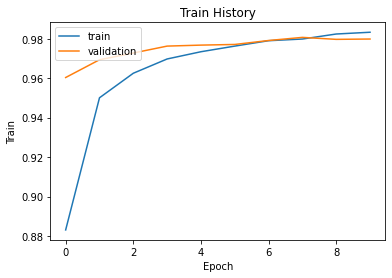

In [60]:
show_train_history(train_history,'acc','val_acc')

In [62]:
scores_add_two=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

 9952/10000 [============================>.] - ETA: 0s
accuracy= 0.9764
